# House Prices - Advanced Regression Techniques
##### Kaggle Dataset

In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando dataset
df_train = pd.read_csv("train.csv")

In [3]:
# Shape
df_train.shape

(1460, 81)

In [4]:
# columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Confirmando se há dados vazios
df_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

#### Visualizando dados vazios em % da coluna

In [9]:

(df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [10]:
# Eliminando as colunas com mais de 10% valores vazios
eliminar = df_train.columns[(df_train.isnull().sum()/df_train.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
# Eliminando essas colunas
df_train = df_train.drop(eliminar, axis = 1)

In [12]:
(df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False).head(20)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
PavedDrive      0.000000
WoodDeckSF      0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
dtype: float64

In [13]:
# Selecionar apenas as colunas numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_train_numeric = df_train.select_dtypes(include=numerics)

In [14]:
list(df_train_numeric.columns.values)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [15]:
df_train_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
# Como o Professor do vídeo fez
colunas = df_train.columns[df_train.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
# Criar uma nova base com novos valores ( eu ja tinha filtrado na coluna df_train_numerics, mas usarei o metódo do instrutor)
df_train_numericsbase = df_train.loc[:,colunas]
df_train_numericsbase.head()


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
# Verificando valores vazios
df_train_numericsbase.isnull().sum().sort_values(ascending = False).head(4)

GarageYrBlt    81
MasVnrArea      8
Id              0
OpenPorchSF     0
dtype: int64

In [19]:
df_train_numericsbase.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [20]:
# Substituindo valores vazios por -1 (-1 pra indicar que, não foi um erro, essa informação ja não existia)
df_train_numericsbase = df_train_numericsbase.fillna(-1)

In [21]:
df_train_numericsbase.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## Criando Modelo
##### Separando por treino e teste (usando doc Scikit-learn)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
# Selecionando X e y
X = df_train_numericsbase.drop('SalePrice', axis=1)
y = df_train_numericsbase.SalePrice

In [23]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [24]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

#### Utilizando Algoritmos mais simples como:
##### Regressão linear
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
##### Árvore de regressão
https://scikit-learn.org/stable/modules/tree.html#regression
##### KNeighborsRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [25]:
# import regressão linear
from sklearn.linear_model import LinearRegression

In [26]:
# Criando regressor linear e fazendo o fit com dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [27]:
# Fazendo a previsão pros dados de teste
y_rl = reg_rl.predict(X_test)

In [28]:
# import tree
from sklearn import tree

In [29]:
# Criando tree regressor linear e fazendo o fit com dados de treino
reg_tr = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [30]:
# Fazendo a previsão pros dados de teste
y_tr = reg_tr.predict(X_test)

In [31]:
# import KNN
from sklearn.neighbors import KNeighborsRegressor

In [32]:
# Criando KNN e fazendo o fit com dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [33]:
# Fazendo a previsao
y_knn = reg_knn.predict(X_test)

### E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:
#### Erro Médio Absoluto
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
#### Erro Quadrático Médio
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [34]:
# Import erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [35]:
# Import erro quadrático médio
from sklearn.metrics import mean_squared_error

In [36]:
# Avaliando o erro de regressão
print(mean_absolute_error(y_test,y_rl))
print(mean_squared_error(y_test, y_rl))

23680.76109194202
1467779521.124732


In [37]:
# Da árvore de decisão
print(mean_absolute_error(y_test,y_tr))
print(mean_squared_error(y_test, y_tr))

28156.31678082192
2724436631.8339043


In [38]:
# Do KNN
print(mean_absolute_error(y_test,y_knn))
print(mean_squared_error(y_test, y_knn))

34592.331335616436
2755690544.7889557


### Criando o Plot visualmente do y_test

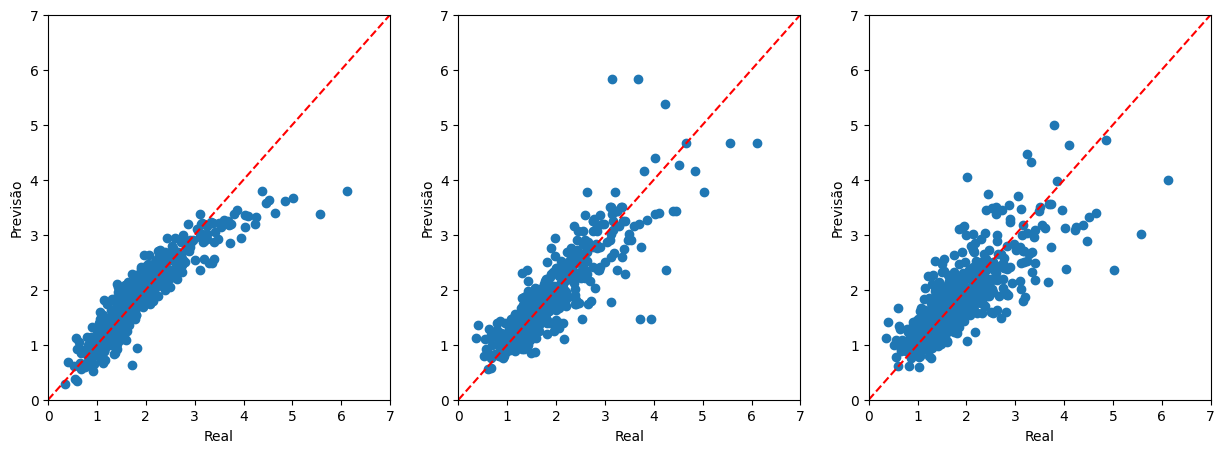

In [39]:
# Criando o gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].scatter(y_test/100000, y_rl/100000)
ax[0].plot([0,700000], [0,700000], '--r')
ax[1].scatter(y_test/100000, y_tr/100000)
ax[1].plot([0,700000], [0,700000], '--r')
ax[2].scatter(y_test/100000, y_knn/100000)
ax[2].plot([0,700000], [0,700000], '--r')

ax[0].set(xlim=(0,7), ylim=(0,7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0,7), ylim=(0,7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0,7), ylim=(0,7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

# Fazendo a previsão para a base de teste da competição

In [40]:
# Importanto a base de teste
df_test = pd.read_csv("test.csv")

In [41]:
# Visualizando a base
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Repetir os mesmos tratamentos do de treino

Obs: NÃO podemos excluir linhas

In [42]:
 # Verificando
(df_test.isnull().sum()/df_test.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
dtype: float64

In [43]:
# Eliminando as colunas com mais de 10% valores vazios
df_test = df_test.drop(eliminar, axis=1)

In [44]:
# Verificando as colunas numéricas
colunas2 = df_test.columns[df_test.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [45]:
# Mantendo tambem apenas as colunas numéricas
df_test = df_test.loc[:,colunas2]

In [46]:
# Verficando base restando
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [47]:
df_test.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

In [48]:
# Substituindo valores vazios por -1
df_test = df_test.fillna(-1)

In [49]:
# Verificando
df_test.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [50]:
# Usando Regressão linear pra fazer a previsão
y_pred = reg_rl.predict(df_test)

In [51]:
# Podemos adicionar essa coluna de previsão na nossa base
df_test['SalePrice'] = y_pred

In [52]:
# E extrair somente o Id e o SalePrice
resultado = df_test[['Id', 'SalePrice']]

In [53]:
# Podemos então exportar essa base
resultado.to_csv('resultado4.csv', index=False) # Não quer o index (aquele 0 1 2 do head)